# Linear Regression

In [450]:
# Import dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [451]:
df = pd.read_csv('BostonHousingDataset.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [452]:
# Dimensions of the Dataset
print(df.shape)

(506, 14)


In [453]:
# Remove MEDV outliers (MEDV=50.0)
df = df[~(df['MEDV'] >= 50.0)]

In [454]:
# RM - average number of rooms per dwelling
rm = df['RM']
rm.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [455]:
# Summarize the data to see the distribution of RM
rm.describe()

count    490.000000
mean       6.245471
std        0.653147
min        3.561000
25%        5.881000
50%        6.185000
75%        6.578000
max        8.780000
Name: RM, dtype: float64

In [456]:
# MEDV - Median value of owner-occupied homes in $1000's
medv = df['MEDV']
medv.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [457]:
# Summarize the data to see the distribution of MEDV
medv.describe()

count    490.000000
mean      21.635918
std        7.865301
min        5.000000
25%       16.700000
50%       20.900000
75%       24.675000
max       48.800000
Name: MEDV, dtype: float64

In [458]:
X = np.array(rm)
y = np.array(medv)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (490,)
Shape of y: (490,)


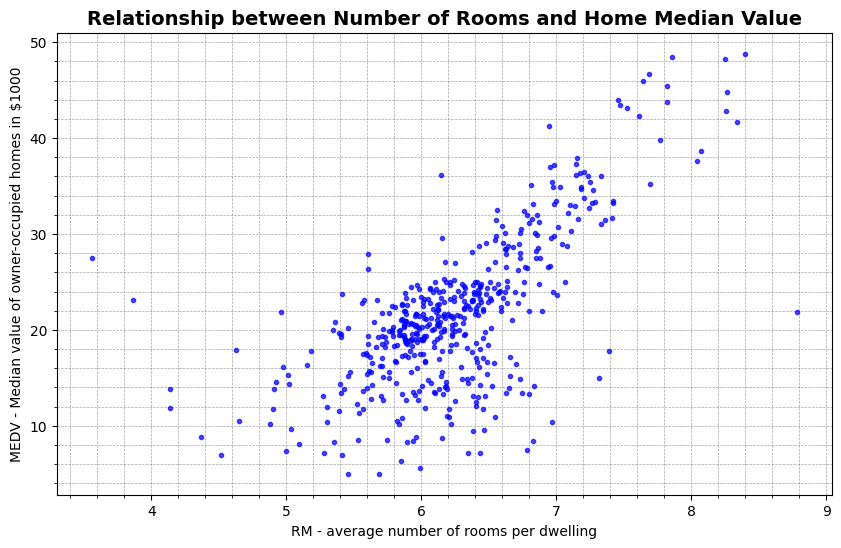

In [459]:
# Plotting
plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Rooms and Home Median Value', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'o', color='blue', markersize=3, alpha=0.7)
plt.xlabel('RM - average number of rooms per dwelling')
plt.ylabel('MEDV - Median value of owner-occupied homes in $1000')
plt.show()

### Lets use Scipy for linear regression, we want to achive the same result by hand

In [460]:
from scipy import stats
fit_cheat = stats.linregress(X, y)
m = fit_cheat.slope
b = fit_cheat.intercept
print(f'y = {round(m, 2)}x + ({round(b, 2)})')
print(fit_cheat)

y = -30.01x + (8.27)
LinregressResult(slope=8.26855732242698, intercept=-30.00512014537584, rvalue=0.6866343142060232, pvalue=1.4107579483708467e-69, stderr=0.39630587668231626, intercept_stderr=2.4885877274165695)


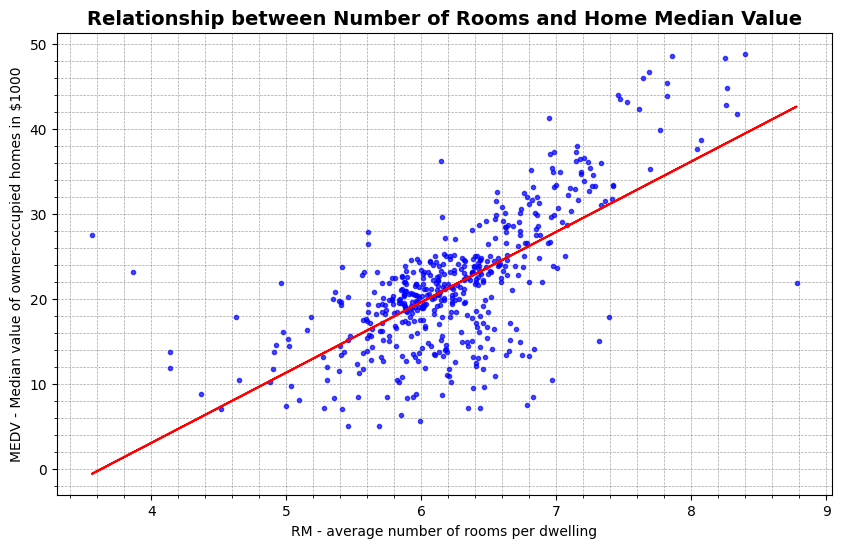

In [461]:
# Plotting with cheat
plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Rooms and Home Median Value', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'o', color='blue', markersize=3, alpha=0.7)
plt.plot(X, fit_cheat.intercept + fit_cheat.slope*X, 'r', label='fitted line')
plt.xlabel('RM - average number of rooms per dwelling')
plt.ylabel('MEDV - Median value of owner-occupied homes in $1000')
plt.show()